In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline

pd.options.display.float_format = '{:.2f}'.format

In [2]:
ruta_train='C:/Users/Juan Diego Bernate V/Documents/Python/Practica/PUBG/train_V2.csv'
train=pd.read_csv(ruta_train)

In [8]:
#ruta_test='C:/Users/Juan Diego Bernate V/Downloads/Python/Practica/PUBG/test_V2.csv'
#test=pd.read_csv(ruta_test)

In [11]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 39 columns):
Id                         object
groupId                    object
matchId                    object
assists                    int64
boosts                     int64
damageDealt                float64
DBNOs                      int64
headshotKills              int64
heals                      int64
killPlace                  int64
killPoints                 int64
kills                      int64
killStreaks                int64
longestKill                float64
matchDuration              int64
matchType                  object
maxPlace                   int64
numGroups                  int64
rankPoints                 int64
revives                    int64
rideDistance               float64
roadKills                  int64
swimDistance               float64
teamKills                  int64
vehicleDestroys            int64
walkDistance               float64
weaponsAcquired

In [4]:
train.shape

(4446966, 29)

In [34]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [3]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [3]:
train.drop(2744604, inplace=True)

In [11]:
train.describe()
#train.boxplot(column=['assists'])
#CALCULAR:
# Numero de jugadores de partida,numero de jugadores por equipo, km recorrido,
#identificar cheaters(kills/km, super sniper), outliers en general
#Normalizar en funcion de los jugadores por partida

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,winPlacePerc,Cant_jugadores,Kmtotal,Kill/CantJugad,Damage/CantJugad,DBNOs/CantJugad,headshotKills/CantJugad,Kills/Kmtotal,headshotKills/Kill,Boosteos
count,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,...,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.446932e+06,4.351098e+06,1.917211e+06,4.446932e+06
mean,2.337546e-01,1.106912e+00,1.306830e+02,6.578461e-01,2.266877e-01,1.370119e+00,4.759970e+01,5.050074e+02,9.244238e-01,5.439188e-01,...,4.728182e-01,9.419530e+01,1.764850e+03,1.023483e-02,1.443057e+00,7.101327e-03,2.513307e-03,inf,2.391802e-01,2.477031e+00
std,5.879758e-01,1.715792e+00,1.703037e+02,1.145154e+00,5.987961e-01,2.679940e+00,2.746275e+01,6.275058e+02,1.552695e+00,7.108166e-01,...,3.074035e-01,6.683867e+00,2.183122e+03,2.650188e-02,2.827866e+00,1.473704e-02,8.800813e-03,NaN,3.532466e-01,3.879963e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e-01,9.300000e+01,1.581000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,4.583000e-01,9.500000e+01,7.882000e+02,0.000000e+00,8.946392e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,7.407000e-01,9.700000e+01,2.728500e+03,1.098901e-02,1.980000e+00,1.052632e-02,0.000000e+00,9.732360e-04,5.000000e-01,4.000000e+00
max,1.700000e+01,3.300000e+01,4.238000e+03,3.900000e+01,3.500000e+01,8.000000e+01,1.010000e+02,2.170000e+03,4.000000e+01,2.000000e+01,...,1.000000e+00,1.000000e+02,4.127010e+04,5.000000e+00,5.165000e+02,3.181818e+00,3.250000e+00,inf,1.000000e+00,8.100000e+01


In [4]:
train['Cant_jugadores'] = train.groupby('matchId')['matchId'].transform('count')

In [10]:
list(train)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc',
 'Cant_jugadores',
 'Kmtotal',
 'Kill/CantJugad',
 'Damage/CantJugad',
 'DBNOs/CantJugad',
 'headshotKills/CantJugad',
 'Kills/Kmtotal',
 'headshotKills/Kill',
 'Boosteos']

In [5]:
train['Kmtotal'] =train['rideDistance']+train['swimDistance']+train['walkDistance']
train['Kill/CantJugad'] =train['kills']/train['Cant_jugadores']
train['Damage/CantJugad'] =train['damageDealt']/train['Cant_jugadores']
train['DBNOs/CantJugad'] =train['DBNOs']/train['Cant_jugadores']
train['headshotKills/CantJugad'] =train['headshotKills']/train['Cant_jugadores']
train['Kills/Kmtotal'] =train['kills']/train['Kmtotal']
train['headshotKills/Kill'] =train['headshotKills']/train['kills']
##Bosteos
train['Boosteos'] =train['boosts']+train['heals']

In [49]:
##Identificando outliers#
Revisar outliers para cada uno las variables normalizadas.

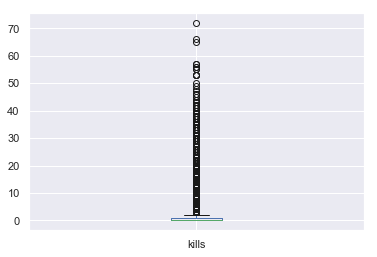

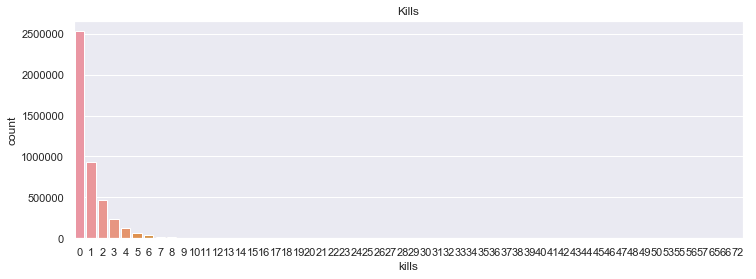

In [8]:
train.kills.describe()

train.boxplot(column=['kills'])

plt.figure(figsize=(12,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()


In [6]:
#Eliminamos los outliers de Kills
train=train[train['kills']<=40]


C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


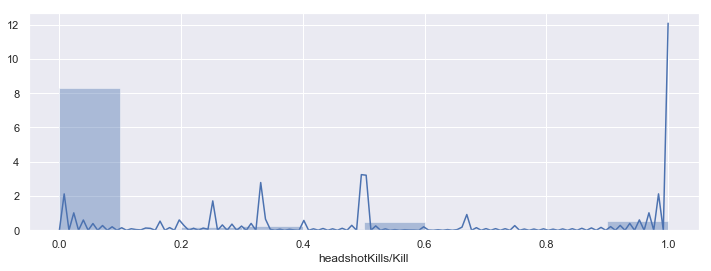

In [7]:
#Outliers HeadShot Kills
train['headshotKills/Kill'].describe()
train['headshotKills/Kill'].isnull()
train['headshotKills/Kill']=train['headshotKills/Kill'].fillna(0)

plt.figure(figsize=(12,4))
sns.distplot(train['headshotKills/Kill'], bins=10)
plt.show()

#Los voy a dejar.

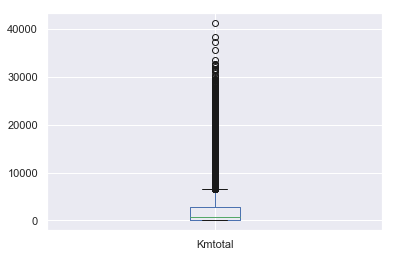

In [8]:
# Outliers Kmtotal
train.boxplot(column=['Kmtotal'])

train.Kmtotal.describe()

#Arbitrariamente voy a quitar los mayores a 20000 mt

train=train[train['Kmtotal']<=20000]


C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


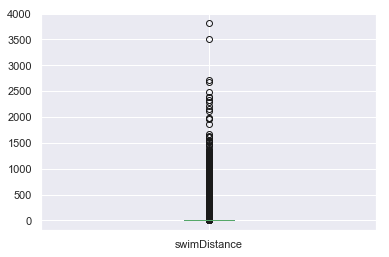

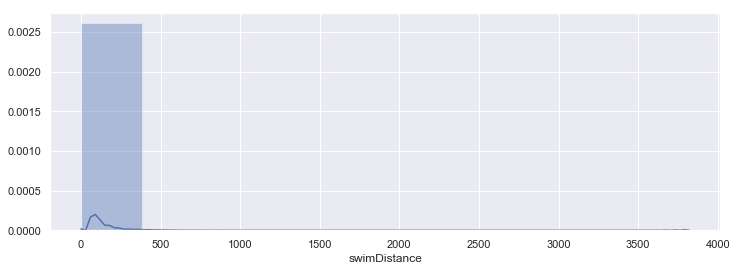

In [9]:
#Nadadores
train['swimDistance'].describe()
train.boxplot(column=['swimDistance'])

plt.figure(figsize=(12,4))
sns.distplot(train['swimDistance'], bins=10)
plt.show()

train=train[train['swimDistance']<1000]

C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


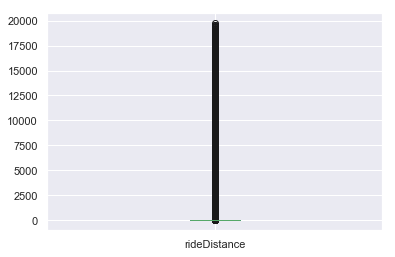

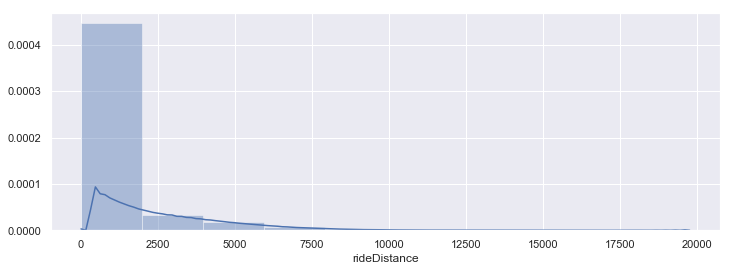

In [10]:
#Conductores

train['rideDistance'].describe()
train.boxplot(column=['rideDistance'])

plt.figure(figsize=(12,4))
sns.distplot(train['rideDistance'], bins=10)
plt.show()

train=train[train['rideDistance']<10000]

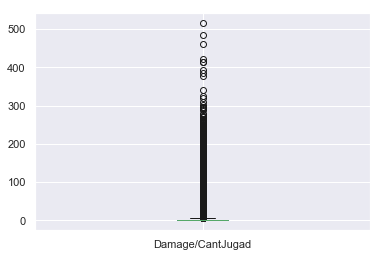

In [11]:
#Outliers Damage

#train['Damage/CantJugad'].isnull().sum()
train['Damage/CantJugad'].describe()
train.boxplot(column=['Damage/CantJugad'])

#voy a sacar los que hicieron más de 50 dmg/jug
train=train[train['Damage/CantJugad']<=50]

C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


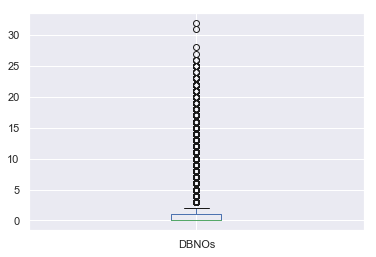

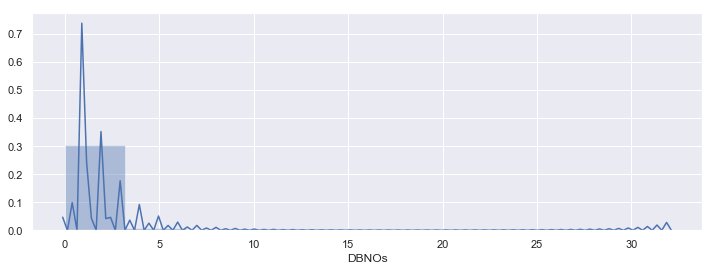

count   4437072.00
mean          0.65
std           1.11
min           0.00
25%           0.00
50%           0.00
75%           1.00
max          10.00
Name: DBNOs, dtype: float64

In [12]:
#Outliers DBNOs  Number of enemy players knocked.
#train['DBNOs'].describe()
train.boxplot(column=['DBNOs'])

plt.figure(figsize=(12,4))
sns.distplot(train['DBNOs'], bins=10)
plt.show()

#Podría quitar los mayores de 5, pero voy a quitar los mayores de 10

train= train[train['DBNOs']<=10]

train['DBNOs'].describe()

C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


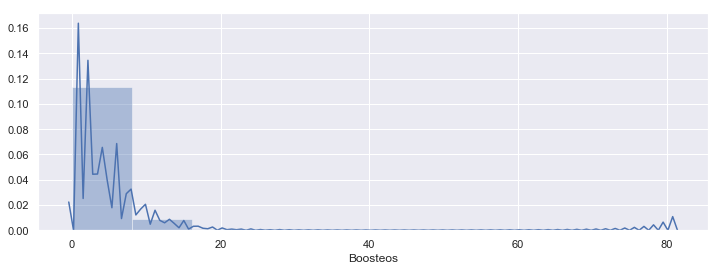

In [13]:
# Outliers Bosteos
train['Boosteos'].describe()

plt.figure(figsize=(12,4))
sns.distplot(train['Boosteos'], bins=10)
plt.show()
#Dejo los menores a 30

train=train[train['Boosteos']<=30]


C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


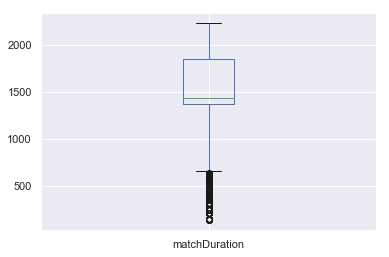

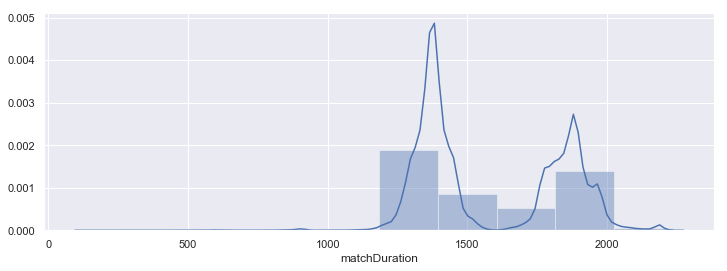

In [14]:
##Outliers de duracion

train['matchDuration'].describe()

train.boxplot(column=['matchDuration'])


plt.figure(figsize=(12,4))
sns.distplot(train['matchDuration'], bins=10)
plt.show()

train=train[(train['matchDuration']>800) & (train['matchDuration']<=2250)]


C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


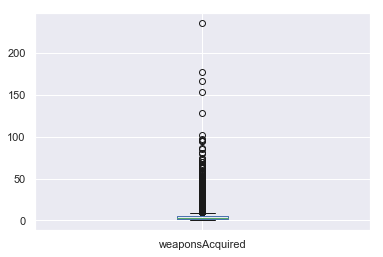

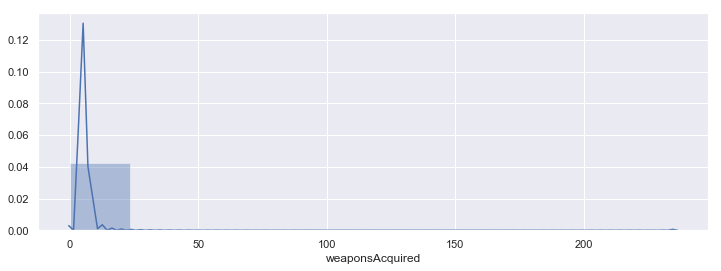

In [15]:
#Outliers de armas conseguidas

train['weaponsAcquired'].describe()

train.boxplot(column=['weaponsAcquired'])


plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=10)
plt.show()

train=train[train['weaponsAcquired']<=30]

In [16]:
#Algunos Casos Especiales


#Eliminamos casos atipicos de kills sin movimiento
train['KillsSinMoverse']=((train['kills'] > 0) & (train['Kmtotal'] == 0))
train = train[train.KillsSinMoverse != True]
train.KillsSinMoverse.unique()


array([False])

C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


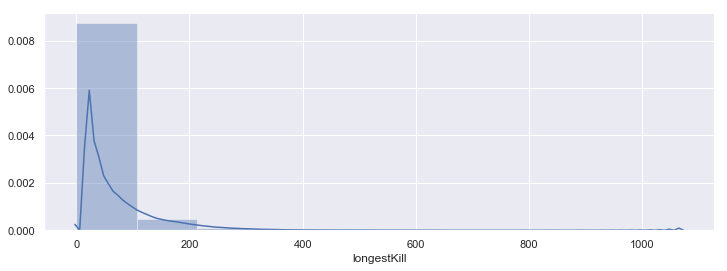

In [17]:
#Sniper ratas
#train.boxplot(column=['longestKill'])
train['longestKill'].describe()
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()
train = train[train.longestKill <= 300]

In [80]:
list(train)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc',
 'Cant_jugadores',
 'Kmtotal',
 'Kill/CantJugad',
 'Damage/CantJugad',
 'DBNOs/CantJugad',
 'headshotKills/CantJugad',
 'Kills/Kmtotal',
 'headshotKills/Kill',
 'Boosteos',
 'KillsSinMoverse']

In [18]:
train = pd.get_dummies(train, columns=['matchType'])

In [99]:
train.shape

(4410630, 54)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4411320 entries, 0 to 4446965
Data columns (total 54 columns):
Id                            object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance                  float64
weaponsAcquired               int64
winPoints   

In [140]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'Cant_jugadores', 'Kmtotal',
       'Kill/CantJugad', 'Damage/CantJugad', 'DBNOs/CantJugad',
       'headshotKills/CantJugad', 'Kills/Kmtotal', 'headshotKills/Kill',
       'Boosteos', 'KillsSinMoverse', 'matchType_crashfpp',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_

In [19]:
#Codigo copiado Neto.

train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

train.drop(columns=['groupId', 'matchId'], inplace=True)

train[['groupId_cat', 'matchId_cat']].head()

train.drop(columns=['Id'], inplace=True)

In [20]:
train.drop(columns=['Kills/Kmtotal'], inplace=True)
train.drop(columns=['KillsSinMoverse'], inplace=True)

In [29]:
train.isnull().sum()

assists                             0
boosts                              0
damageDealt                         0
DBNOs                               0
headshotKills                       0
heals                               0
killPlace                           0
killPoints                          0
kills                               0
killStreaks                         0
longestKill                         0
matchDuration                       0
maxPlace                            0
numGroups                           0
rankPoints                          0
revives                             0
rideDistance                        0
roadKills                           0
swimDistance                        0
teamKills                           0
vehicleDestroys                     0
walkDistance                        0
weaponsAcquired                     0
winPoints                           0
winPlacePerc                        0
Cant_jugadores                      0
Kmtotal     

In [21]:
## Modelos

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


C:\Users\Juan Diego Bernate V\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
#Sampleo porque no me da
np.random.seed(123)
ds=train.sample(n=400000)
ds.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
3776027,0,0,23.70,1,0,0,21,0,2,2,...,0,0,0,0,0,0,0,1,1635136,7060
1562668,1,0,445.40,0,1,1,5,0,4,1,...,0,0,0,0,0,1,0,0,1829752,23449
3217770,0,1,0.00,0,0,0,39,1247,0,0,...,0,0,0,0,0,0,1,0,225134,9893
1575450,0,0,97.11,0,0,0,68,1531,0,0,...,0,0,0,0,0,0,0,0,1972837,14298
2579934,1,1,162.30,0,0,0,35,1333,1,1,...,0,0,0,0,0,0,0,1,73702,12116


In [30]:
np.random.seed(123)

X = ds.drop(['winPlacePerc'], axis=1)
y = ds['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape[0], X_test.shape[0])

320000 80000


In [131]:
#RandomForestRegressor().get_params().keys()
GradientBoostingRegressor().get_params().keys()


dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'presort', 'random_state', 'subsample', 'verbose', 'warm_start'])

In [31]:
parameter_gridRFR = {
   'n_estimators' : [2000, 2500],
   'max_features': [0.5, 0.8, None, 'sqrt'],
    'max_depth': [5, 10, 15, None],
    'n_jobs':[-1]
       }



parameter_gridGBR = {
    'learning_rate' : [0.1, 0.05, 0.01],
       'n_estimators' : [ 2000, 2500],
    'loss': ['ls', 'lad'],
    'max_depth': [5, 10, 15, None]
    }

grid_search1 = GridSearchCV(RandomForestRegressor(n_jobs=-1), parameter_gridRFR,
                            verbose=3, scoring ='mean_absolute_error')#cv=5#

grid_search2 = GridSearchCV(GradientBoostingRegressor(), parameter_gridGBR,
                             verbose=3, scoring ='mean_absolute_error')#cv=5#

In [ ]:
#grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] max_depth=5, max_features=0.5, n_estimators=2000, n_jobs=-1 .....


In [32]:
from sklearn.metrics import mean_absolute_error


def puntaje(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

RFR=RandomForestRegressor(n_estimators= 1000,max_features= 0.5,verbose=3)
GBR=GradientBoostingRegressor(n_estimators= 1000,max_depth= 0.5,verbose=3)

In [34]:
RFR.fit(X_train, y_train)
puntaje(RFR)


NameError: name 'X_valid' is not defined